# 2. Think about look-alike innovation from the past. When you pick one, give your justifications in 1-2 paragraphs.


They're the first all-electric pickup trucks that can go just as far as gas-powered trucks and tow just as much weight. This means that businesses and tradespeople can now switch to electric trucks without giving up the performance they need.

Here is the link to the data:
https://finance.yahoo.com/quote/RIVN/history?period1=1538352000&period2=1696118400&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true

In [68]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime

In [69]:
def bass_model(t, p, q, M):
    """    
    Args:
        t (numpy array): Time period.
        p (float): Coefficient of innovation.
        q (float): Coefficient of imitation.
        M (float): Total potential market size.

    """
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

In [70]:
file_path = 'C:/Users/Vahagn Tovmasyan/Downloads/RIVN.csv'
df = pd.read_csv(file_path)
print(df.head())
df = df.dropna(subset=['Date', 'Price'])
#Price in USD

        Date        Price
0  10/1/2022  339511300.0
1  11/1/2022  268498500.0
2  12/1/2022  370192800.0
3   1/1/2023  618961000.0
4   2/1/2023  431817100.0


In [71]:
dates_str = df['Date'].astype(str).values
price = df['Price'].values

dates = []
for date_str in dates_str:
    try:
        date = datetime.strptime(date_str, '%m/%d/%Y')
        dates.append(date)
    except ValueError:
        continue

time_periods = [(date - dates[0]).days / 30 + 1 for date in dates]


In [72]:
initial_guess = [0.01, 0.3, min(price)]
params, params_covariance = curve_fit(bass_model, time_periods, price, p0=initial_guess)
p_est, q_est, M_est = params

# 4. Estimate Bass model parameters for the look-alike innovation.

In [73]:
print(f"Estimated p (coefficient of innovation): {p_est}")
print(f"Estimated q (coefficient of imitation): {q_est}")
print(f"Estimated M (total potential market size): {M_est}")

Estimated p (coefficient of innovation): 0.19559444734296438
Estimated q (coefficient of imitation): -0.010897242407592695
Estimated M (total potential market size): 971067407.8286995


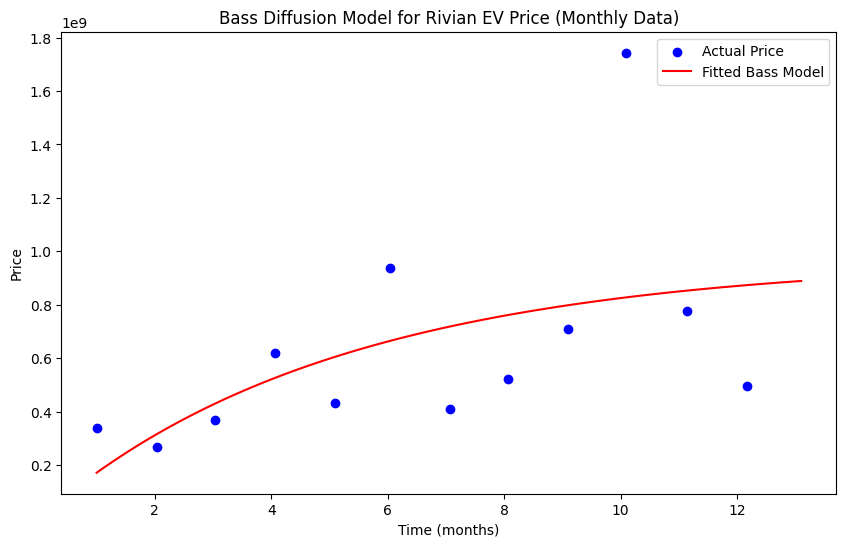

In [74]:
t = np.arange(1, max(time_periods) + 1, 0.1)
predicted_price = bass_model(t, p_est, q_est, M_est)

plt.figure(figsize=(10, 6))
plt.scatter(time_periods, price, label='Actual Price', color='blue')
plt.plot(t, predicted_price, label='Fitted Bass Model', color='red')
plt.xlabel('Time (months)')
plt.ylabel('Price')
plt.legend()
plt.title('Bass Diffusion Model for Rivian EV Price (Monthly Data)')
plt.show()

# 5. Make predictions of the diffusion of the innovation you chose at stage 1

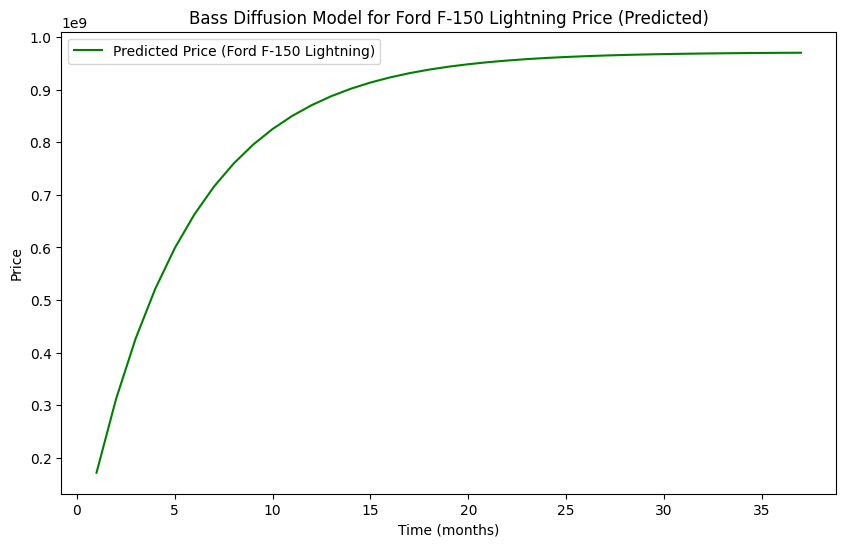

In [75]:
p_rivian = p_est
q_rivian = q_est
M_rivian = M_est

t = np.arange(1, max(time_periods) + 25, 1)

predicted_price_ford = bass_model(t, p_rivian, q_rivian, M_rivian)

plt.figure(figsize=(10, 6))
plt.plot(t, predicted_price_ford, label='Predicted Price (Ford F-150 Lightning)', color='green')
plt.xlabel('Time (months)')
plt.ylabel('Price')
plt.legend()
plt.title('Bass Diffusion Model for Ford F-150 Lightning Price (Predicted)')
plt.show()
#Estimation for 2 years

In [76]:
def cumulative_adopters(t, p, q, M):
    """
    Calculate cumulative adopters over time based on the Bass Diffusion Model.

    Args:
        t (numpy array): Time period.
        p (float): Coefficient of innovation.
        q (float): Coefficient of imitation.
        M (float): Total potential market size.

    Returns:
        numpy array: Cumulative adopters at each time period.
    """
    adopters = M * (1 - np.exp(-(p + q) * t))
    return adopters

def potential_market_share(t, p, q):
    """
    Calculate potential market share over time based on the Bass Diffusion Model.

    Args:
        t (numpy array): Time period.
        p (float): Coefficient of innovation.
        q (float): Coefficient of imitation.

    Returns:
        numpy array: Potential market share at each time period.
    """
    market_share = (p + q) / p * (1 - np.exp(-(p + q) * t))
    return market_share

next_month_adopters = cumulative_adopters(t + 1, p_rivian, q_rivian, M_rivian) - cumulative_adopters(t, p_rivian, q_rivian, M_rivian)
next_month_adopters_fermi = 0.15 * M_rivian

In [77]:
next_month_market_share = next_month_adopters / M_rivian

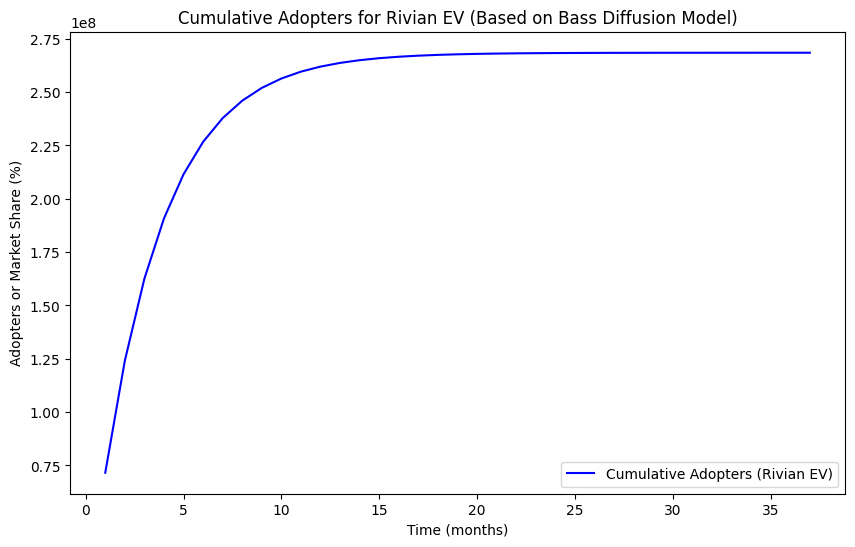

In [78]:
p_rivian, q_rivian, M_rivian = 0.01, 0.3, min(price)

# Calculate the cumulative adopters and potential market share for each time period
t = np.arange(1, max(time_periods) + 25, 1)
cumulative_adopters_rivian = cumulative_adopters(t, p_rivian, q_rivian, M_rivian)

# Plot the cumulative adopters and potential market share
plt.figure(figsize=(10, 6))
plt.plot(t, cumulative_adopters_rivian, label='Cumulative Adopters (Rivian EV)', color='blue')
plt.xlabel('Time (months)')
plt.ylabel('Adopters or Market Share (%)')
plt.legend()
plt.title('Cumulative Adopters for Rivian EV (Based on Bass Diffusion Model)')
plt.show()